In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 


In [85]:
#Couldn't get this to work, do not understand it - what is "../input" or anything with ".."? 
#I've seen it before and can't find an answer

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [86]:
#Importing DataSet 
dataset = pd.read_csv("~/Data Science Labs/Assignment Sets/kc_house_data.csv")
space=dataset['sqft_living']
price=dataset['price']
print(space.head())
print(price.head())

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


In [87]:
#Define Variables, note that one variable must be reshaped or scikitlearn's LinearRegression() will not work)
x = np.array(space).reshape(-1,1)
y = np.array(price)
print(x.shape)
print(y.shape)

(21613, 1)
(21613,)


In [88]:
#Splitting the data into Train and Test
#NOTE have to use model_selection instead of cross_validation
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)
print("The shape of xtrain is ", xtrain.shape)
print("The shape of xtest is ", xtest.shape)
print("The shape of ytrain is ", ytrain.shape)
print("The shape of ytest is ", xtrain.shape)

The shape of xtrain is  (14408, 1)
The shape of xtest is  (7205, 1)
The shape of ytrain is  (14408,)
The shape of ytest is  (14408, 1)


In [89]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
#Predicting the prices
pred = regressor.predict(xtest)

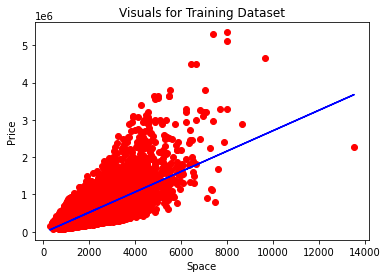

In [91]:
#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

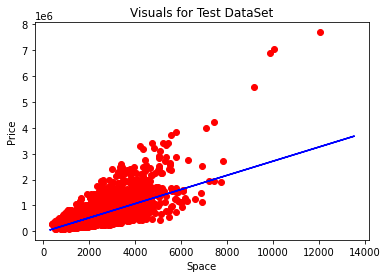

In [92]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

# Alternate Methodology using np.polyfit to know slope equation

In [93]:
#We still have xtrain, xtest, ytrain and ytest from above
xpoly = np.array(space)

xtrain, xtest, ytrain, ytest = train_test_split(xpoly,y,test_size=1/3, random_state=0)
mtrain, btrain = np.polyfit(xtrain, ytrain, 1)
print(f'The training slope (m or w) is {mtrain}')
print(f'The training intercept (b or w0) is {btrain}')

The training slope (m or w) is 273.80181791839993
The training intercept (b or w0) is -29039.6907340569


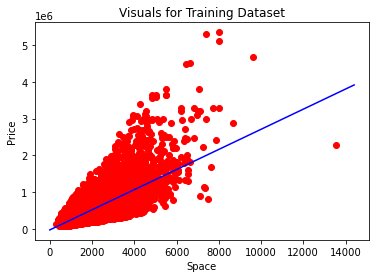

In [94]:
x2 = np.array([0,len(xtrain)])
y2 = mtrain*x2 + btrain

plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(x2, y2, color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [95]:
#We still have xtrain, xtest, ytrain and ytest from above

mtest, btest = np.polyfit(xtest, ytest, 1)
print(f'The test slope (m or w) is {mtest}')
print(f'The test intercept (b or w0) is {btest}')

The test slope (m or w) is 294.4394929948354
The test intercept (b or w0) is -73112.47891444301


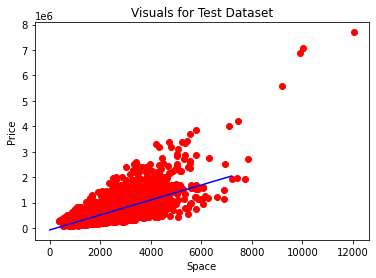

In [96]:
xtest2 = np.array([0,len(xtest)])
ytest2 = mtest*xtest2 + btest

plt.scatter(xtest, ytest, color = 'red')
plt.plot(xtest2, ytest2, color='blue')
plt.title ("Visuals for Test Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

## This shows that both sklearn LinearRegression() and np.polyfit give the same results.
## However, np.polyfit doesn't require a variable to be reshaped (sklearn does) and np.polyfit also gives the slope and intercept without needing extra code